# **Prophet Forecasting**

In [ ]:
%pip install yfinance

In [ ]:
import yfinance as yf
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=yf.download('MSFT', start='2010-01-01', end=pd.Timestamp.today().strftime('2025-07-29'))
data

/tmp/ipython-input-3-1130760132.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download('MSFT', start='2010-01-01', end=pd.Timestamp.today().strftime('2025-07-29'))
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2010-01-04,23.211441,23.323936,22.941453,22.963952,38409100
2010-01-05,23.218933,23.323929,22.978944,23.136438,49749600
2010-01-06,23.076443,23.308932,22.888951,23.158938,58182400
2010-01-07,22.836460,23.023952,22.641469,22.971453,50559700
2010-01-08,22.993954,23.158946,22.678968,22.708967,51197400
...,...,...,...,...,...
2025-07-22,505.269989,511.200012,505.269989,510.970001,13868600
2025-07-23,505.869995,506.790009,500.700012,506.750000,16396600


In [ ]:
data.reset_index(inplace=True)

In [ ]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,MSFT,MSFT,MSFT,MSFT,MSFT
0,2010-01-04,23.211441,23.323936,22.941453,22.963952,38409100
1,2010-01-05,23.218933,23.323929,22.978944,23.136438,49749600
2,2010-01-06,23.076443,23.308932,22.888951,23.158938,58182400
3,2010-01-07,22.836460,23.023952,22.641469,22.971453,50559700
4,2010-01-08,22.993954,23.158946,22.678968,22.708967,51197400
...,...,...,...,...,...,...
3910,2025-07-22,505.269989,511.200012,505.269989,510.970001,13868600
3911,2025-07-23,505.869995,506.790009,500.700012,506.750000,16396600
3912,2025-07-24,510.880005,513.669983,507.299988,508.769989,16107000


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,MSFT,MSFT,MSFT,MSFT,MSFT
0,2010-01-04,23.211441,23.323936,22.941453,22.963952,38409100
1,2010-01-05,23.218933,23.323929,22.978944,23.136438,49749600
2,2010-01-06,23.076443,23.308932,22.888951,23.158938,58182400
3,2010-01-07,22.836460,23.023952,22.641469,22.971453,50559700
4,2010-01-08,22.993954,23.158946,22.678968,22.708967,51197400
...,...,...,...,...,...,...
3910,2025-07-22,505.269989,511.200012,505.269989,510.970001,13868600
3911,2025-07-23,505.869995,506.790009,500.700012,506.750000,16396600
3912,2025-07-24,510.880005,513.669983,507.299988,508.769989,16107000


In [ ]:
data.set_index('Date', inplace=True)

In [ ]:
data

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2010-01-04,23.211441,23.323936,22.941453,22.963952,38409100
2010-01-05,23.218933,23.323929,22.978944,23.136438,49749600
2010-01-06,23.076443,23.308932,22.888951,23.158938,58182400
2010-01-07,22.836460,23.023952,22.641469,22.971453,50559700
2010-01-08,22.993954,23.158946,22.678968,22.708967,51197400
...,...,...,...,...,...
2025-07-22,505.269989,511.200012,505.269989,510.970001,13868600
2025-07-23,505.869995,506.790009,500.700012,506.750000,16396600


In [ ]:
#df = data.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

#Fit the model
#model=Prophet()
#model.fit(df)

In [ ]:
# Reset the index to make 'Date' a column
df = data.reset_index()

# Select 'Date' and the 'Close' column data, which is under ('Close', 'MSFT')
# Access the data values directly to avoid carrying over the multi-index on values
df = pd.DataFrame({
    'ds': df['Date'],
    'y': df[('Close', 'MSFT')]
})

In [ ]:
model=Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpasr3n4u8/l3e7rzfs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpasr3n4u8/7ha7y4d1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46706', 'data', 'file=/tmp/tmpasr3n4u8/l3e7rzfs.json', 'init=/tmp/tmpasr3n4u8/7ha7y4d1.json', 'output', 'file=/tmp/tmpasr3n4u8/prophet_modelpts767cg/prophet_model-20250730042414.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:24:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:24:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=model.make_future_dataframe(periods=365)
forecast=model.predict(future)

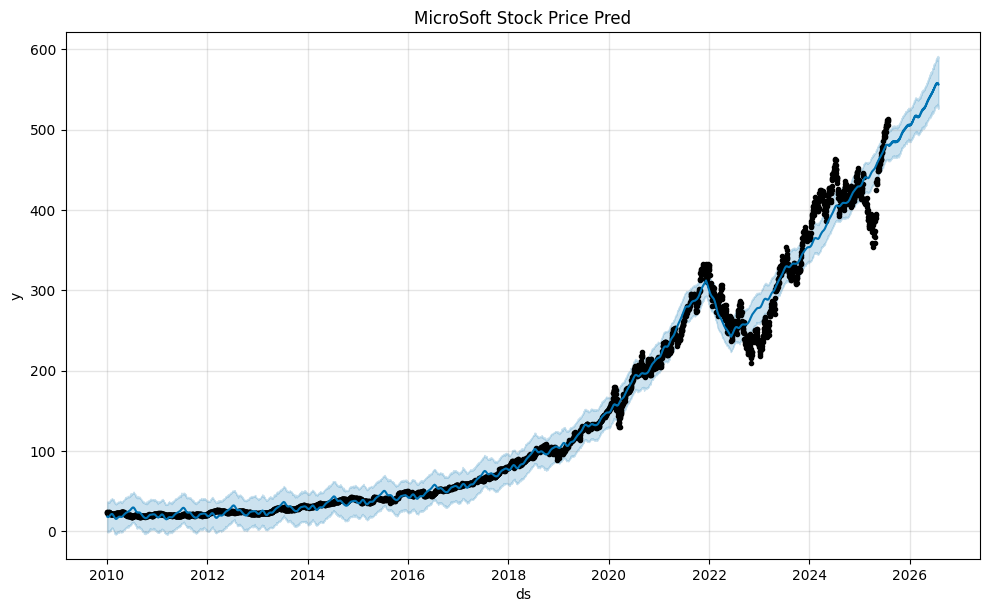

In [ ]:
model.plot(forecast)
plt.title('MicroSoft Stock Price Pred')
plt.show()

# **ARIMA Forecasting (using Statsmodels)**

In [ ]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [ ]:
data=yf.download('MSFT',start='2015-01-01', end=pd.Timestamp.today().strftime('2025-07-28'))

/tmp/ipython-input-15-766446056.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download('MSFT',start='2015-01-01', end=pd.Timestamp.today().strftime('2025-07-28'))
[*********************100%***********************]  1 of 1 completed


In [ ]:
data

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2015-01-02,39.998703,40.563270,39.810516,39.913164,27913900
2015-01-05,39.630871,39.973030,39.562437,39.665085,39673900
2015-01-06,39.049206,39.990149,38.955111,39.673650,36447900
2015-01-07,39.545345,39.742088,38.912348,39.331494,29114100
2015-01-08,40.708683,40.845548,39.964482,39.990143,29645200
...,...,...,...,...,...
2025-07-21,510.059998,512.090027,505.549988,506.709991,14066800
2025-07-22,505.269989,511.200012,505.269989,510.970001,13868600


In [ ]:
#data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
#data.set_index('Date', inplace=True)

In [ ]:
df = data.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

In [ ]:
model = ARIMA(data['Close'], order=(5,1,0))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


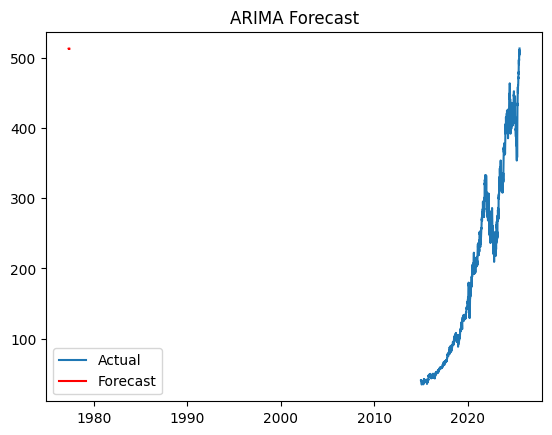

In [ ]:
forecast = model_fit.forecast(steps=30)
# Plot
plt.plot(data['Close'], label='Actual') # Plot the 'Close' column for the actual data
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

# **SARIMA Forecasting (with Seasonality)**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
forecast = model_fit.get_forecast(steps=30)
forecast_ci = forecast.conf_int()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


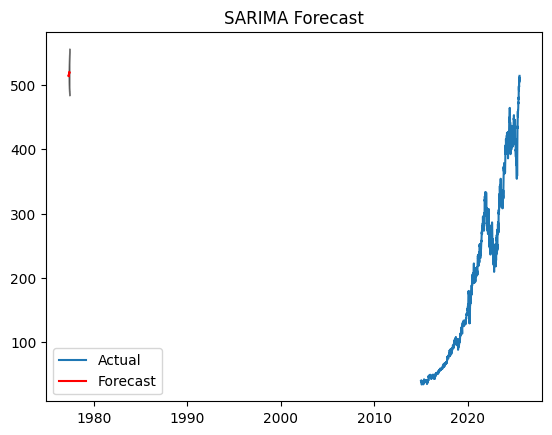

In [ ]:
plt.plot(data['Close'], label='Actual')
forecast.predicted_mean.plot(label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=0.5)
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

# **Prophet Forecasting (by Facebook/Meta)**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpasr3n4u8/22o0h6d2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpasr3n4u8/bgsvaeo7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88887', 'data', 'file=/tmp/tmpasr3n4u8/22o0h6d2.json', 'init=/tmp/tmpasr3n4u8/bgsvaeo7.json', 'output', 'file=/tmp/tmpasr3n4u8/prophet_modelq4b6nlzm/prophet_model-20250730042446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:24:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:24:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


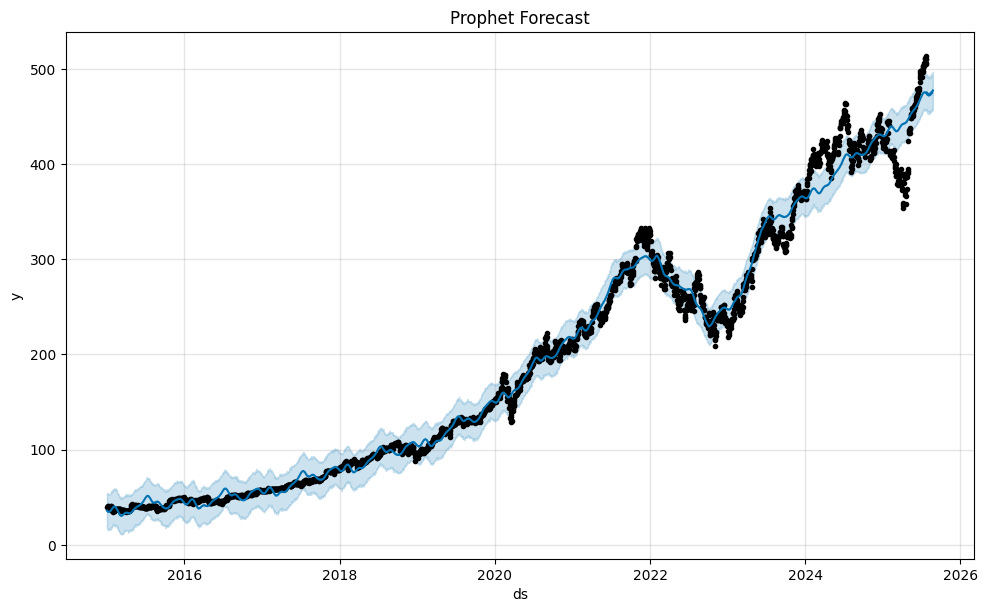

In [ ]:
from prophet import Prophet
df = data.reset_index()
df = pd.DataFrame({
    'ds': df['Date'],
    'y': df[('Close', 'MSFT')]
})
model = Prophet()
model.fit(df)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

model.plot(forecast)
plt.title('Prophet Forecast')
plt.show()

# **LSTM Forecasting (using TensorFlow/Keras)**

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
df = data.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

Shape of data: (2656, 5)
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0245
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 2.0645e-04
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 2.0240e-04
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 1.7571e-04
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 1.8450e-04
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 1.8023e-04
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 1.8528e-04
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 1.6433e-04
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 1.5390e-04
Epoch 10/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 1.9591e-04
Epoch 11/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 1.5210e-04
Epoch 12/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 1.6242e-04
Epoch 13/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 1.4072e-04
Epoch 14/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 1.3738e-04
Epoch 15/20
65/65 ━━━━━━━━━━━━

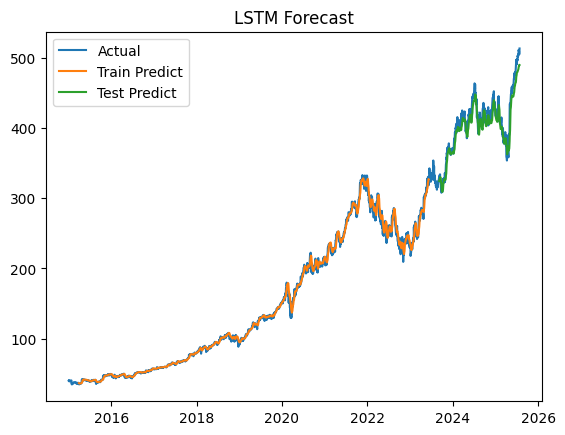

In [ ]:
print("Shape of data:", data.shape)
scaler = MinMaxScaler(feature_range=(0, 1))
if data.empty:
  print("Error: 'data' DataFtrame is empty. Please check data loading or preprocessing.")
else:
  scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

train_size=int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size,:], scaled_data[train_size:]

def create_dataset(dataset, time_step=60):
  X, Y = [], []
  for i in range(len(dataset)-time_step-1):
    X.append(dataset[i:(i+time_step), 0])
    Y.append(dataset[i + time_step, 0])
  return np.array(X), np.array(Y)

time_step = 60
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20, batch_size=32)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

plt.plot(data.index, data['Close'], label='Actual')
plt.plot(data.index[time_step:len(train_predict)+time_step], train_predict, label='Train Predict')
plt.plot(data.index[len(train_predict)+(2*time_step)+1:len(data)-1], test_predict, label='Test Predict')
plt.title('LSTM Forecast')
plt.legend()
plt.show()

In [ ]:
# %pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.9 MB/s eta 0:00:00


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px
# from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from prophet import Prophet
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error
# import streamlit as st

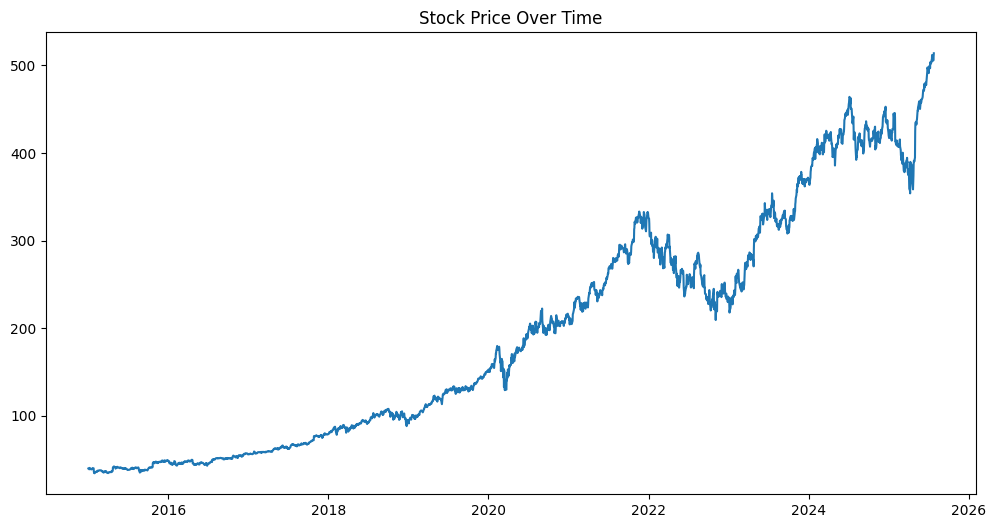

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 0.0214
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 3.5467e-04
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 3.4339e-04
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 3.6753e-04
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 3.2585e-04
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 2.9950e-04
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 2.6813e-04
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 2.5920e-04
Epoch 9/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 2.6570e-04
Epoch 10/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 2.5054e-04
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


2025-07-30 04:27:58.508 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 04:27:58.989 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-30 04:27:58.990 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 04:27:58.992 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 04:27:59.530 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 04:27:59.531 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 04:27:59.534 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 04:27:59.536 Thread 'MainThread': mi

DeltaGenerator()

In [ ]:
# plt.figure(figsize=(12,6))
# plt.plot(data['Close'])
# plt.title('Stock Price Over Time')
# plt.show()

# # 📏 ARIMA Forecasting
# model_arima = ARIMA(data['Close'], order=(5,1,0))
# result_arima = model_arima.fit()
# forecast_arima = result_arima.forecast(steps=30)


# # Calculate RMSE for ARIMA
# rmse_arima = np.sqrt(mean_squared_error(data['Close'][-30:], forecast_arima)) # Calculate RMSE for the last 30 data points


# # 📏 SARIMA Forecasting
# model_sarima = SARIMAX(data['Close'], order=(1,1,1), seasonal_order=(1,1,0,12))
# result_sarima = model_sarima.fit()
# forecast_sarima = result_sarima.forecast(30)


# # Calculate RMSE for SARIMA
# rmse_sarima = np.sqrt(mean_squared_error(data['Close'][-30:], forecast_sarima)) # Calculate RMSE for the last 30 data points


# # 📏 Prophet Forecasting
# prophet_df = data.reset_index()[['Date', 'Close']]
# prophet_df.columns = ['ds', 'y']
# model_prophet = Prophet()
# model_prophet.fit(prophet_df)
# future = model_prophet.make_future_dataframe(periods=30)
# forecast_prophet = model_prophet.predict(future)


# # Calculate RMSE for Prophet
# rmse_prophet = np.sqrt(mean_squared_error(data['Close'][-30:], forecast_prophet['yhat'][-30:]))  # Calculate RMSE for the last 30 data points


# # 📏 LSTM Forecasting
# scaler = MinMaxScaler(feature_range=(0,1))
# data_scaled = scaler.fit_transform(data[['Close']])

# X, y = [], []
# for i in range(60, len(data_scaled)):
#     X.append(data_scaled[i-60:i, 0])
#     y.append(data_scaled[i, 0])

# X, y = np.array(X), np.array(y)
# X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# model_lstm = Sequential()
# model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
# model_lstm.add(LSTM(units=50))
# model_lstm.add(Dense(1))

# model_lstm.compile(loss='mean_squared_error', optimizer='adam')
# model_lstm.fit(X, y, epochs=10, batch_size=32)


# # Make predictions for LSTM
# # Define scaled_data here, before it's used
# scaled_data = scaler.fit_transform(data[['Close']].values)  # Reshape if necessary
# train_size = int(len(scaled_data) * 0.8)
# train, test = scaled_data[:train_size], scaled_data[train_size:]


# def create_dataset(dataset, time_step=60):
#     X, Y = [], []
#     for i in range(len(dataset)-time_step-1):
#         X.append(dataset[i:(i+time_step), 0])
#         Y.append(dataset[i + time_step, 0])
#     return np.array(X), np.array(Y)

# time_step = 60
# _, X_test = create_dataset(test, time_step) # Recalculate X_test

# # The original line causing the error:
# # X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# # Reshape X_test to 3D, but with only one feature
# X_test = X_test.reshape(X_test.shape[0], 1, 1)


# inputs = data_scaled[len(data_scaled) - len(X_test) - 60:]
# inputs = inputs.reshape(-1, 1)
# inputs = scaler.transform(inputs)
# X_test_lstm = []
# for i in range(60, inputs.shape[0]):
#     X_test_lstm.append(inputs[i - 60:i, 0])
# X_test_lstm = np.array(X_test_lstm)
# X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

# lstm_predictions = model_lstm.predict(X_test_lstm)
# lstm_predictions = scaler.inverse_transform(lstm_predictions)


# # Calculate RMSE for LSTM
# rmse_lstm = np.sqrt(mean_squared_error(data['Close'][-30:], lstm_predictions[-30:]))  # Calculate RMSE for the last 30 data points



# # 📊 Streamlit Dashboard
# st.title("Stock Market Forecast Dashboard")
# st.line_chart(data['Close'])
# st.subheader("ARIMA Forecast")
# st.line_chart(forecast_arima)
# st.subheader("SARIMA Forecast")
# st.line_chart(forecast_sarima)
# st.subheader("Prophet Forecast")
# st.line_chart(forecast_prophet[['ds', 'yhat']].set_index('ds').tail(30))

# st.subheader("Model Accuracy (RMSE)")
# st.write(f'ARIMA RMSE: {rmse_arima:.2f}')
# st.write(f'SARIMA RMSE: {rmse_sarima:.2f}')
# st.write(f'Prophet RMSE: {rmse_prophet:.2f}')
# st.write(f'LSTM RMSE: {rmse_lstm:.2f}')

# st.success("All forecasts generated successfully!")

In [ ]:
# %pip install streamlit-colab
# import streamlit_colab
# launch_streamlit = streamlit_colab.run_streamlit

In [ ]:
# %%writefile app.py
# import yfinance as yf
# from prophet import Prophet
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px
# from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from prophet import Prophet
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error
# import streamlit as st


# data=yf.download('MSFT', start='2010-01-01', end=pd.Timestamp.today().strftime('2025-07-29'))
# plt.figure(figsize=(12,6))
# plt.plot(data['Close'])
# plt.title('Stock Price Over Time')
# plt.show()

# # 📏 ARIMA Forecasting
# model_arima = ARIMA(data['Close'], order=(5,1,0))
# result_arima = model_arima.fit()
# forecast_arima = result_arima.forecast(steps=30)


# # Calculate RMSE for ARIMA
# rmse_arima = np.sqrt(mean_squared_error(data['Close'][-30:], forecast_arima)) # Calculate RMSE for the last 30 data points


# # 📏 SARIMA Forecasting
# model_sarima = SARIMAX(data['Close'], order=(1,1,1), seasonal_order=(1,1,0,12))
# result_sarima = model_sarima.fit()
# forecast_sarima = result_sarima.forecast(30)


# # Calculate RMSE for SARIMA
# rmse_sarima = np.sqrt(mean_squared_error(data['Close'][-30:], forecast_sarima)) # Calculate RMSE for the last 30 data points


# # 📏 Prophet Forecasting
# prophet_df = data.reset_index()[['Date', 'Close']]
# prophet_df.columns = ['ds', 'y']
# model_prophet = Prophet()
# model_prophet.fit(prophet_df)
# future = model_prophet.make_future_dataframe(periods=30)
# forecast_prophet = model_prophet.predict(future)


# # Calculate RMSE for Prophet
# rmse_prophet = np.sqrt(mean_squared_error(data['Close'][-30:], forecast_prophet['yhat'][-30:]))  # Calculate RMSE for the last 30 data points


# # 📏 LSTM Forecasting
# scaler = MinMaxScaler(feature_range=(0,1))
# data_scaled = scaler.fit_transform(data[['Close']])

# X, y = [], []
# for i in range(60, len(data_scaled)):
#     X.append(data_scaled[i-60:i, 0])
#     y.append(data_scaled[i, 0])

# X, y = np.array(X), np.array(y)
# X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# model_lstm = Sequential()
# model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
# model_lstm.add(LSTM(units=50))
# model_lstm.add(Dense(1))

# model_lstm.compile(loss='mean_squared_error', optimizer='adam')
# model_lstm.fit(X, y, epochs=10, batch_size=32)


# # Make predictions for LSTM
# # Define scaled_data here, before it's used
# scaled_data = scaler.fit_transform(data[['Close']].values)  # Reshape if necessary
# train_size = int(len(scaled_data) * 0.8)
# train, test = scaled_data[:train_size], scaled_data[train_size:]


# def create_dataset(dataset, time_step=60):
#     X, Y = [], []
#     for i in range(len(dataset)-time_step-1):
#         X.append(dataset[i:(i+time_step), 0])
#         Y.append(dataset[i + time_step, 0])
#     return np.array(X), np.array(Y)

# time_step = 60
# _, X_test = create_dataset(test, time_step) # Recalculate X_test

# # The original line causing the error:
# # X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# # Reshape X_test to 3D, but with only one feature
# X_test = X_test.reshape(X_test.shape[0], 1, 1)


# inputs = data_scaled[len(data_scaled) - len(X_test) - 60:]
# inputs = inputs.reshape(-1, 1)
# inputs = scaler.transform(inputs)
# X_test_lstm = []
# for i in range(60, inputs.shape[0]):
#     X_test_lstm.append(inputs[i - 60:i, 0])
# X_test_lstm = np.array(X_test_lstm)
# X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

# lstm_predictions = model_lstm.predict(X_test_lstm)
# lstm_predictions = scaler.inverse_transform(lstm_predictions)


# # Calculate RMSE for LSTM
# rmse_lstm = np.sqrt(mean_squared_error(data['Close'][-30:], lstm_predictions[-30:]))  # Calculate RMSE for the last 30 data points



# # 📊 Streamlit Dashboard
# st.title("Stock Market Forecast Dashboard")
# st.line_chart(data['Close'])
# st.subheader("ARIMA Forecast")
# st.line_chart(forecast_arima)
# st.subheader("SARIMA Forecast")
# st.line_chart(forecast_sarima)
# st.subheader("Prophet Forecast")
# st.line_chart(forecast_prophet[['ds', 'yhat']].set_index('ds').tail(30))

# st.subheader("Model Accuracy (RMSE)")
# st.write(f'ARIMA RMSE: {rmse_arima:.2f}')
# st.write(f'SARIMA RMSE: {rmse_sarima:.2f}')
# st.write(f'Prophet RMSE: {rmse_prophet:.2f}')
# st.write(f'LSTM RMSE: {rmse_lstm:.2f}')

# st.success("All forecasts generated successfully!")

Writing app.py


In [ ]:
# You need to get an ngrok authentication token from https://dashboard.ngrok.com/get-started/your-authtoken
# Add your ngrok token below
#ngrok_token = "30YqMwfo7P7vzYrLllJVL6X7kPs_3miuEpwZXRkZYpa2LUDVq"

#launch_streamlit("app.py", ngrok_token=ngrok_token)

Public URL: https://a44d1af88ce4.ngrok-free.app
